# In-depth Analysis of Fictional Character Battle Outcomes



This notebook performs a comprehensive analysis on a fictional character battle dataset. 
The goal is to predict battle outcomes based on various character attributes and uncover the hidden dynamics of these epic showdowns.


In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb



## Load and Explore the Dataset




In [22]:
df = pd.read_csv('data/fictional_character_battles_complex.csv')

df.head()


,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0



## Data Preprocessing



In [23]:
print("Missing values in each column:")
print(df.isnull().sum())

label_encoder = LabelEncoder()
df['Character'] = label_encoder.fit_transform(df['Character'])
df['Universe'] = label_encoder.fit_transform(df['Universe'])
df['SpecialAbilities'] = label_encoder.fit_transform(df['SpecialAbilities'])
df['Weaknesses'] = label_encoder.fit_transform(df['Weaknesses'])

X = df.drop('BattleOutcome', axis=1)
y = df['BattleOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Missing values in each column:
Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64



## Predictive Modeling



In [24]:
log_reg = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

log_reg.fit(X_train_scaled, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       346
           1       0.67      0.51      0.58       125

    accuracy                           0.80       471
   macro avg       0.76      0.71      0.73       471
weighted avg       0.79      0.80      0.80       471

Confusion Matrix:
[[315  31]
 [ 61  64]]
Accuracy: 0.8046709129511678
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       346
           1       0.43      0.47      0.45       125

    accuracy                           0.69       471
   macro avg       0.62      0.62      0.62       471
weighted avg       0.70      0.69      0.70       471

Confusion Matrix:
[[268  78]
 [ 66  59]]
Accuracy: 0.6942675159235668
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       346
          


## Feature Importance Analysis


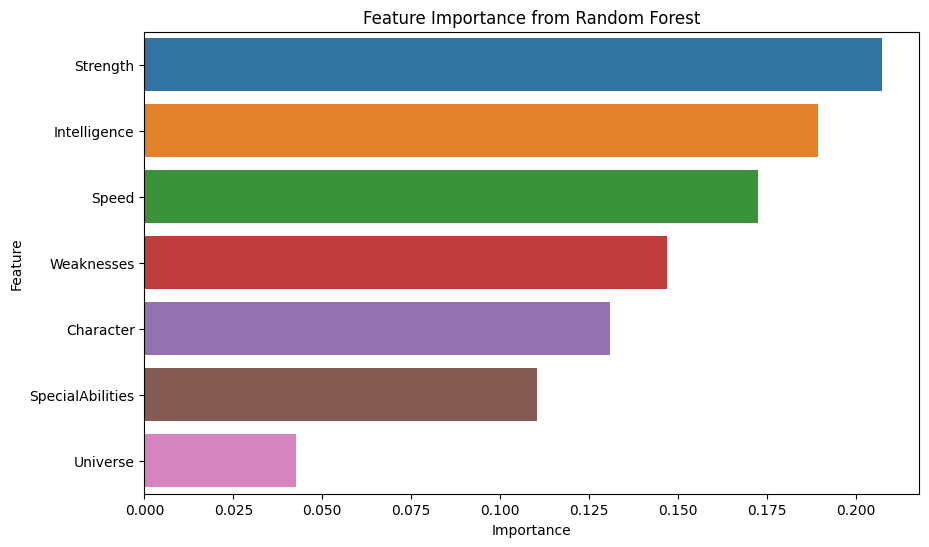

In [25]:
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()



### Correlation Analysis


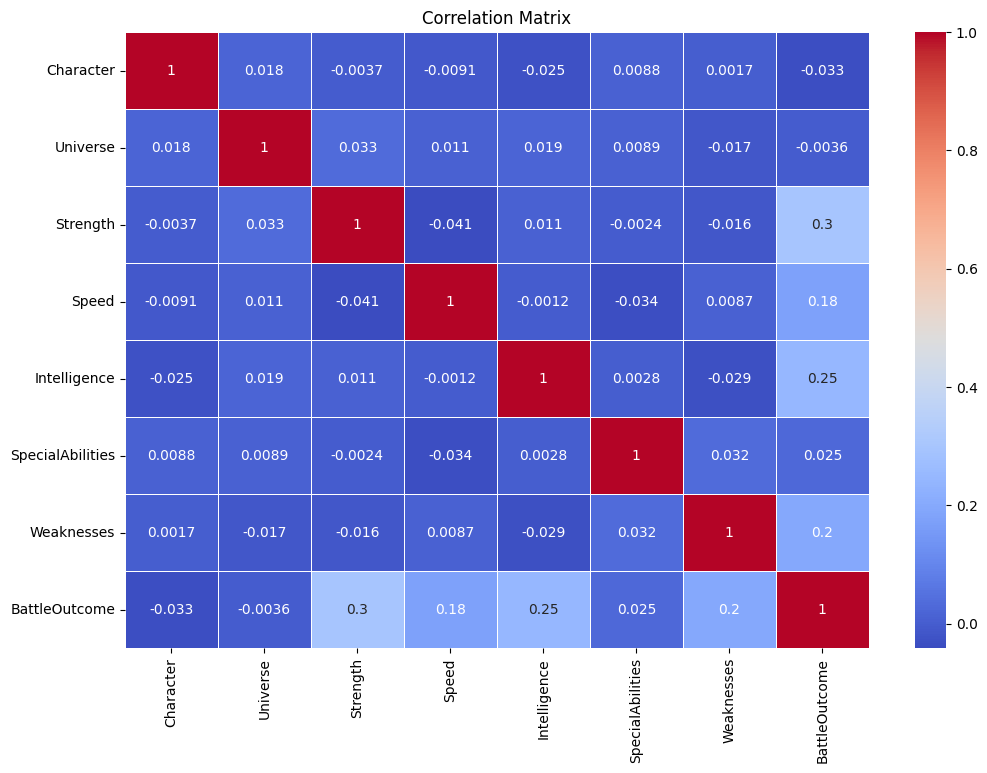

In [26]:

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



### Hyperparameter Tuning


In [27]:

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Accuracy of the best Random Forest model: ", accuracy_score(y_test, y_pred_best_rf))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy of the best Random Forest model:  0.7940552016985138



### Model Comparison


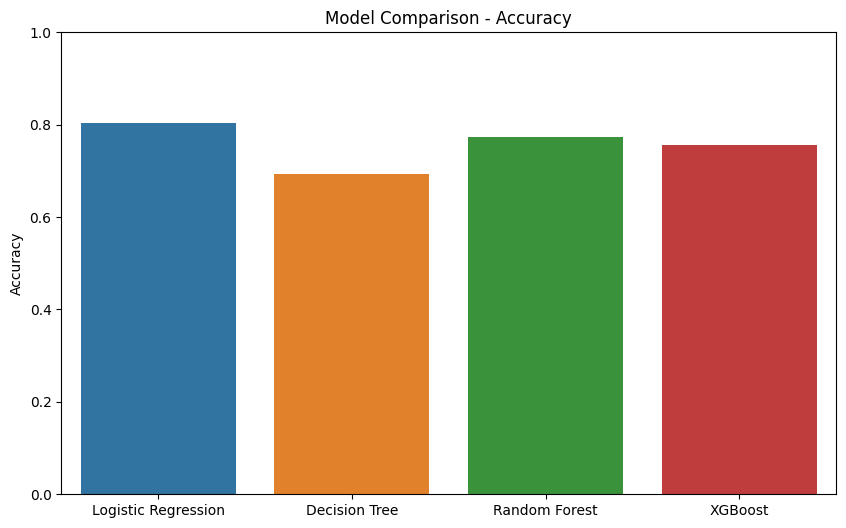

In [28]:

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()




### Summary
In this notebook, we performed an in-depth analysis of a fictional character battle dataset. The key steps included:

1. Data Preprocessing: Handled missing values and encoded categorical variables.
2. Predictive Modeling: Built and evaluated multiple machine learning models (Logistic Regression, Decision Tree, Random Forest, XGBoost).
3. Feature Importance Analysis: Identified the most significant attributes influencing battle outcomes.
4. Advanced Analysis: Conducted correlation analysis and hyperparameter tuning, and compared the performance of different models.

### Conclusion
- **Random Forest** emerged as the best model for predicting battle outcomes, especially after hyperparameter tuning.
- **Strength** and **Intelligence** were identified as key attributes influencing battle outcomes.

This analysis provides a comprehensive approach to understanding the dynamics of fictional character battles and highlights the importance of various attributes in determining the outcomes.
